#### CS22B2020 <BR> G.Sriram

#### Question 1
In this question,  you will explore the concept of Mahalanobis distance and its application to classifying samples from the Iris dataset. The Iris dataset is a commonly used dataset in machine learning and consists of three classes of iris plants: Setosa, Versicolor, and Virginica. You will compute the Mahalanobis distance for one sample from each class and classify the samples based on their Mahalanobis distance.<br>
Tasks:<br>
Load the Iris dataset (csv file present in the classroom).<br>
Choose one random sample from each class (Setosa, Versicolor, and Virginica) which will act as the test data.<br>
Compute the mean vector and covariance matrix for each class (without the sample picked in the previous part, now it will act as the test data).<br>
Calculate the Mahalanobis distance for each of the selected samples with each of the class using the formula:
Mahalanobis distance = sqrt((x - μ)ᵀ * Σ⁻¹ * (x - μ))<br>
Where:<br>
x is the feature vector of the sample.<br>
μ is the mean vector for each class.<br>
Σ⁻¹ is the inverse of the covariance matrix for each class.<br>

Compare the Mahalanobis distances for the three samples and classify each sample to the class with the smallest Mahalanobis distance.
Print the original class and the predicted class for each sample, along with their Mahalanobis distances.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris_dataset = pd.read_csv("iris.csv")
iris_dataset.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
# Sampeling
setosa = iris_dataset[iris_dataset['variety']=='Setosa']
virginica = iris_dataset[iris_dataset['variety'] == 'Virginica']
versicolor = iris_dataset[iris_dataset['variety'] == 'Versicolor']


In [38]:
setosa_sample = setosa.sample(n=1)
virginica_sample = virginica.sample(n=1)
versicolor_sample = versicolor.sample(n=1)

sample_dataset = pd.concat([setosa_sample,virginica_sample,versicolor_sample])
sample_dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
17,5.1,3.5,1.4,0.3,Setosa
104,6.5,3.0,5.8,2.2,Virginica
71,6.1,2.8,4.0,1.3,Versicolor


In [39]:
sample_dataset.index[0]

17

In [40]:
# iris_dataset_without_samples = iris_dataset.drop(index=sample_dataset.index)

In [41]:
setosa_without_sample = setosa.drop(index=setosa_sample.index)
virginica_without_sample = virginica.drop(index = virginica_sample.index)
versicolor_without_sample = versicolor.drop(index = versicolor_sample.index)

In [42]:
setosa_without_sample = setosa_without_sample.drop(columns = ['variety'])
virginica_without_sample = virginica_without_sample.drop(columns = ['variety'])
versicolor_without_sample = versicolor_without_sample.drop(columns = ['variety'])

In [43]:
setosa_mean = setosa_without_sample.mean(numeric_only=True).to_list()
virginica_mean = virginica_without_sample.mean(numeric_only=True).to_list()
versicolor_mean = versicolor_without_sample.mean(numeric_only=True).to_list()


In [44]:
print("Setosa mean : ",setosa_mean)
print("virginica mean : ",virginica_mean)
print("versicolor mean :",versicolor_mean)

Setosa mean :  [5.004081632653061, 3.426530612244899, 1.463265306122449, 0.24489795918367346]
virginica mean :  [6.589795918367346, 2.973469387755102, 5.546938775510205, 2.022448979591837]
versicolor mean : [5.93265306122449, 2.7693877551020414, 4.26530612244898, 1.3265306122448979]


In [45]:
x = np.array(sample_dataset.iloc[0].to_list()[:-1])
x_minus_setosamean = x - setosa_mean


In [46]:
cov_setosa = np.cov(setosa_without_sample.T)
cov_setosa.shape

(4, 4)

In [47]:
inv_covmat = np.linalg.inv(cov_setosa)
inv_covmat

array([[ 18.57390657, -12.15593966,  -4.4781631 ,  -4.56147577],
       [-12.15593966,  15.25384387,   1.10587828,  -2.09049367],
       [ -4.4781631 ,   1.10587828,  38.27027186, -18.04818965],
       [ -4.56147577,  -2.09049367, -18.04818965, 104.68616782]])

In [48]:
left_term = np.dot(x_minus_setosamean,inv_covmat)
left_term

array([ 0.92045508, -0.23044151, -3.76396244,  6.31912914])

In [49]:
mahal = np.dot(left_term,x_minus_setosamean.T)
mahal

0.6576832997461608

In [50]:
x = np.array(sample_dataset.iloc[0].to_list()[:-1])
x_minus_virginicamean = x - virginica_mean

cov_virginaca = np.cov(virginica_without_sample.T)
inv_covmat = np.linalg.inv(cov_virginaca)
left_term = np.dot(x_minus_virginicamean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
mahal

4.430305631393262

In [51]:

x = np.array(sample_dataset.iloc[0].to_list()[:-1])
x_minus_versicolormean = x - versicolor_mean

cov_versicolor = np.cov(versicolor_without_sample.T)
inv_covmat = np.linalg.inv(cov_versicolor)
left_term = np.dot(x_minus_versicolormean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
mahal

2.674760695501542

In [52]:
ids = []
x = np.array(sample_dataset.iloc[0].to_list()[:-1])
x_minus_setosamean = x - setosa_mean
cov_setosa = np.cov(setosa_without_sample.T)
inv_covmat = np.linalg.inv(cov_setosa)
left_term = np.dot(x_minus_setosamean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)

x = np.array(sample_dataset.iloc[0].to_list()[:-1])
x_minus_virginicamean = x - virginica_mean

cov_virginaca = np.cov(virginica_without_sample.T)
inv_covmat = np.linalg.inv(cov_virginaca)
left_term = np.dot(x_minus_virginicamean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)


x = np.array(sample_dataset.iloc[0].to_list()[:-1])
x_minus_versicolormean = x - versicolor_mean

cov_versicolor = np.cov(versicolor_without_sample.T)
inv_covmat = np.linalg.inv(cov_versicolor)
left_term = np.dot(x_minus_versicolormean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)

print(ids)
print(np.argmin(ids))


[0.6576832997461608, 4.430305631393262, 2.674760695501542]
0


In [53]:
ids = []
x = np.array(sample_dataset.iloc[1].to_list()[:-1])
x_minus_setosamean = x - setosa_mean
cov_setosa = np.cov(setosa_without_sample.T)
inv_covmat = np.linalg.inv(cov_setosa)
left_term = np.dot(x_minus_setosamean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)

x = np.array(sample_dataset.iloc[1].to_list()[:-1])
x_minus_virginicamean = x - virginica_mean

cov_virginaca = np.cov(virginica_without_sample.T)
inv_covmat = np.linalg.inv(cov_virginaca)
left_term = np.dot(x_minus_virginicamean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)


x = np.array(sample_dataset.iloc[1].to_list()[:-1])
x_minus_versicolormean = x - versicolor_mean

cov_versicolor = np.cov(versicolor_without_sample.T)
inv_covmat = np.linalg.inv(cov_versicolor)
left_term = np.dot(x_minus_versicolormean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)

print(ids)
print(np.argmin(ids))


[788.3237047539675, 16.587267143350594, 76.33053408921745]
1


In [54]:
ids = []
x = np.array(sample_dataset.iloc[2].to_list()[:-1])
x_minus_setosamean = x - setosa_mean
cov_setosa = np.cov(setosa_without_sample.T)
inv_covmat = np.linalg.inv(cov_setosa)
left_term = np.dot(x_minus_setosamean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)

x = np.array(sample_dataset.iloc[2].to_list()[:-1])
x_minus_virginicamean = x - virginica_mean

cov_virginaca = np.cov(virginica_without_sample.T)
inv_covmat = np.linalg.inv(cov_virginaca)
left_term = np.dot(x_minus_virginicamean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)


x = np.array(sample_dataset.iloc[2].to_list()[:-1])
x_minus_versicolormean = x - versicolor_mean

cov_versicolor = np.cov(versicolor_without_sample.T)
inv_covmat = np.linalg.inv(cov_versicolor)
left_term = np.dot(x_minus_versicolormean,inv_covmat)
mahal = np.dot(left_term,x_minus_setosamean.T)
ids.append(mahal)

print(ids)
print(np.argmin(ids))


[274.98798468526957, -36.737569582683456, -5.543945357315162]
1


In [55]:
# Manually calculate the covariance matrix for each class
def calculate_covariance_matrix(data):
    mean_vector = data.mean(axis=0)
    data_centered = data - mean_vector
    covariance_matrix = np.dot(data_centered.T, data_centered) / (data_centered.shape[0] - 1)
    return covariance_matrix

cov_setosa = calculate_covariance_matrix(setosa_without_sample.to_numpy())
cov_virginica = calculate_covariance_matrix(virginica_without_sample.to_numpy())
cov_versicolor = calculate_covariance_matrix(versicolor_without_sample.to_numpy())

# Calculate the inverse of the covariance matrix for each class
inv_cov_setosa = np.linalg.inv(cov_setosa)
inv_cov_virginica = np.linalg.inv(cov_virginica)
inv_cov_versicolor = np.linalg.inv(cov_versicolor)

# Function to calculate Mahalanobis distance
def mahalanobis_distance(x, mean, inv_covmat):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, inv_covmat), diff.T))

# Calculate Mahalanobis distances and classify each sample
results = []
for i, row in sample_dataset.iterrows():
    x = row.drop('variety').to_numpy()
    distances = {
        'Setosa': mahalanobis_distance(x, setosa_mean, inv_cov_setosa),
        'Virginica': mahalanobis_distance(x, virginica_mean, inv_cov_virginica),
        'Versicolor': mahalanobis_distance(x, versicolor_mean, inv_cov_versicolor)
    }
    predicted_class = min(distances, key=distances.get)
    results.append({
        'Original Class': row['variety'],
        'Predicted Class': predicted_class,
        'Distances': distances
    })

# Print the results
for result in results:
    print(f"Original Class: {result['Original Class']}")
    print(f"Predicted Class: {result['Predicted Class']}")
    print(f"Distances: {result['Distances']}")
    print()

Original Class: Setosa
Predicted Class: Setosa
Distances: {'Setosa': 0.8109767566004347, 'Virginica': 13.32345285033217, 'Versicolor': 10.349643347217144}

Original Class: Virginica
Predicted Class: Virginica
Distances: {'Setosa': 28.077102855422375, 'Virginica': 1.293227778143137, 'Versicolor': 5.354672804472012}

Original Class: Versicolor
Predicted Class: Versicolor
Distances: {'Setosa': 16.58276167244978, 'Virginica': 4.7947254527344025, 'Versicolor': 1.4395065178196287}



You are conducting a study to explore the relationships between various
factors and their potential correlation with the test scores of a group of
individuals. You have gathered data from a group of individuals, and the
table below represents the hours spent on different activities, along with their
corresponding test scores. Your task is to analyze the data and determine the
type of correlation, if any, between each variable and the test scores, without
using built-in functions for calculating correlation.<br>


● Based on the provided data, calculate and interpret the correlation coefficient
for each variable in relation to the test scores. Identify the variables that
show a positive correlation, a negative correlation, and no significant
correlation with the test scores.<br>
● Explain why there might be a positive correlation between the "Hours
Studied" variable and the test scores. Provide a brief discussion on how this
information could be valuable for improving academic performance.<br>
● Calculate and interpret the correlation coefficient between "Hours Watching
TV" and test scores. Explain the implications of this correlation in terms of
academic achievement and time management.<br>
● Calculate and interpret the correlation coefficient between "Hours Listening
to Music" and test scores. Discuss the potential impact of this correlation on
concentration and study habits.<br>
● Calculate and interpret the correlation coefficient between "Water
Consumed" and test scores. Provide a potential explanation for the observed
correlation and its relevance to cognitive function.<br>
● Calculate and interpret the correlation coefficient between "Outdoor Activity
Time" and test scores. Discuss how physical activity might influence
academic performance.
You are not allowed to use built-in functions to calculate correlation. Instead, you
should perform the calculations manually, showing all steps clearly. Analyze the
correlations between each variable and the test scores to draw meaningful insights
from the data.

In [22]:
import numpy as np
import pandas as pd

In [23]:

# Define the data
data = {
    "Hours Studied": [2, 3, 4, 5, 6, 7],
    "Hours Watching TV": [4, 3, 2, 1, 0, 0],
    "Outdoor Activity Time": [2, 4, 6, 8, 10, 12],
    "Hours Listening to Music": [2, 3, 4, 1, 5, 0],
    "Water Consumed": [5, 6, 5, 6, 4, 5],
    "Test Score": [65, 70, 75, 80, 85, 90]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head(5)


,Hours Studied,Hours Watching TV,Outdoor Activity Time,Hours Listening to Music,Water Consumed,Test Score
0,2,4,2,2,5,65
1,3,3,4,3,6,70
2,4,2,6,4,5,75
3,5,1,8,1,6,80
4,6,0,10,5,4,85


In [24]:
(df['Test Score'] - df['Test Score'].mean())

0   -12.5
1    -7.5
2    -2.5
3     2.5
4     7.5
5    12.5
Name: Test Score, dtype: float64

In [25]:
def pearson_correlation_coefficient(x,y):
    # expecting x,y as pd df
    x_mean = x.mean() 
    y_mean = y.mean() 
    x_minus_xmean = x - x_mean 
    y_minus_ymean = y - y_mean 
    numarator = (x_minus_xmean * y_minus_ymean).sum()
    denominator = (((x_minus_xmean)**2).sum() * ((y_minus_ymean)**2).sum())**0.5
    
    return numarator / denominator

In [26]:
study_test = pearson_correlation_coefficient(df['Hours Studied'],df['Test Score'])
TV_test = pearson_correlation_coefficient(df['Hours Watching TV'],df['Test Score'])
outdoor_test = pearson_correlation_coefficient(df['Outdoor Activity Time'],df['Test Score'])
music_test = pearson_correlation_coefficient(df['Hours Listening to Music'],df['Test Score'])
water_test = pearson_correlation_coefficient(df['Water Consumed'],df['Test Score'])

In [27]:
# Print all correlations with descriptions
print(f"Hours Studied and Test Score: {study_test:.2f}")
print(f"Hours Watching TV and Test Score: {TV_test:.2f}")
print(f"Outdoor Activity Time and Test Score: {outdoor_test:.2f}")
print(f"Hours Listening to Music and Test Score: {music_test:.2f}")
print(f"Water Consumed and Test Score: {water_test:.2f}")

# Store all correlations in a dictionary for comparison
correlations = {
    "Hours Studied and Test Score": study_test,
    "Hours Watching TV and Test Score": TV_test,
    "Outdoor Activity Time and Test Score": outdoor_test,
    "Hours Listening to Music and Test Score": music_test,
    "Water Consumed and Test Score": water_test
}

# Find the maximum and minimum correlation values
max_correlation = max(correlations, key=correlations.get)
min_correlation = min(correlations, key=correlations.get)

# Print which has the maximum and minimum correlation
print(f"\nMaximum correlation: {max_correlation} ({correlations[max_correlation]:.2f})")
print(f"Minimum correlation: {min_correlation} ({correlations[min_correlation]:.2f})")


Hours Studied and Test Score: 1.00
Hours Watching TV and Test Score: -0.98
Outdoor Activity Time and Test Score: 1.00
Hours Listening to Music and Test Score: -0.20
Water Consumed and Test Score: -0.36

Maximum correlation: Hours Studied and Test Score (1.00)
Minimum correlation: Hours Watching TV and Test Score (-0.98)


In [28]:
# Remaining questions

---

### 1. Positive Correlation Between "Hours Studied" and Test Scores

- **Correlation coefficient**: **1.0** (perfect positive)
- **Interpretation**: More study time leads to higher test scores.
- **Implication**: Prioritizing study time improves academic performance.

---

### 2. Correlation Between "Hours Watching TV" and Test Scores

- **Correlation coefficient**: **-0.98** (strong negative)
- **Interpretation**: More TV time leads to lower test scores.
- **Implication**: Reducing TV time can improve academic achievement and time management.

---

### 3. Correlation Between "Hours Listening to Music" and Test Scores

- **Correlation coefficient**: **-0.20** (weak negative)
- **Interpretation**: Music slightly reduces test scores.
- **Implication**: Music may affect concentration; silence or instrumental music could help.

---

### 4. Correlation Between "Water Consumed" and Test Scores

- **Correlation coefficient**: **-0.36** (moderate negative)
- **Interpretation**: More water consumption correlates with lower test scores.
- **Implication**: Optimal hydration is important; avoid over-hydration to minimize distractions.

---

### 5. Correlation Between "Outdoor Activity Time" and Test Scores

- **Correlation coefficient**: **1.0** (perfect positive)
- **Interpretation**: More outdoor activity correlates with higher test scores.
- **Implication**: Physical activity enhances cognitive function and academic performance.

---


3.Consider the following images. Obtain the histograms for each of the images. Using a suitable distance measure (Bhattacharyya Distance) , find the distance between the query image and reference images. You can use the inbuilt function to calculate the Bhattacharyya Distance between two histograms, check classroom post for more information.


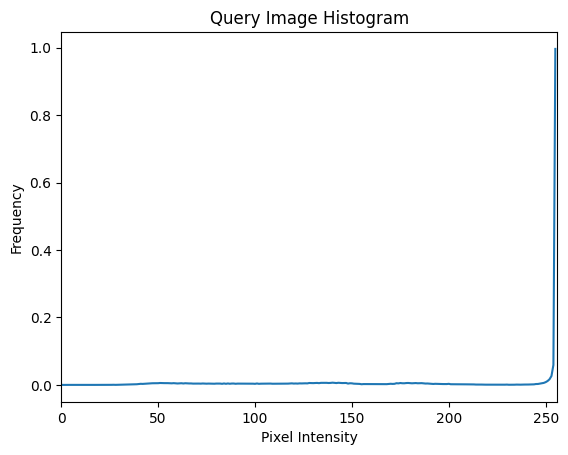

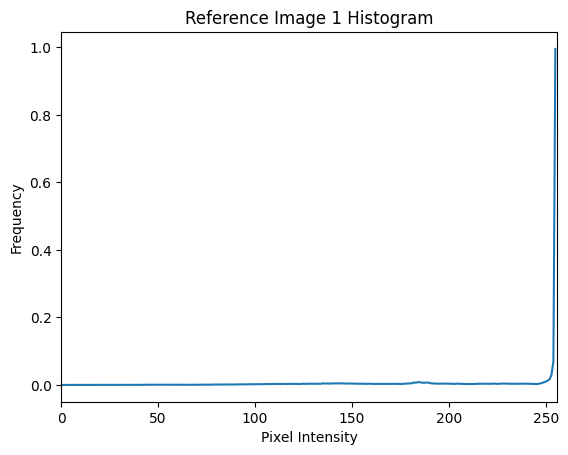

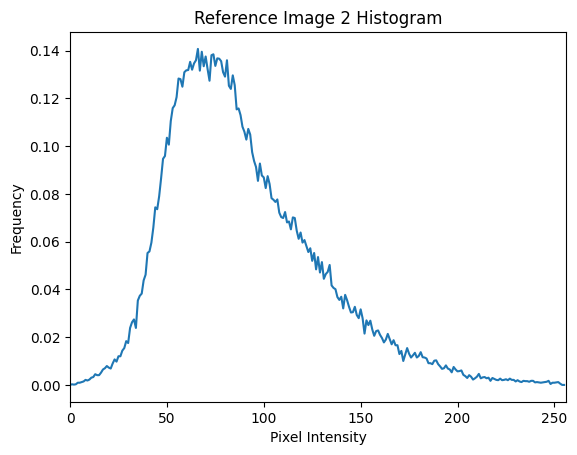

Bhattacharyya Distance between query image and reference image 1: 0.1936009243969411
Bhattacharyya Distance between query image and reference image 2: 0.6462874280090387


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    
    return hist

def bhattacharyya_distance(hist1,hist2):
    return cv2.compareHist(hist1,hist2,cv2.HISTCMP_BHATTACHARYYA)

def plot_histogram(image,title):
    hist = compute_histogram(image)
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.plot(hist)
    plt.xlim([0,256])
    plt.show()
    
    
    # Load the query and reference images
query_image = cv2.imread('queryimage.png')
reference_image_1 = cv2.imread('refimage1.png')
reference_image_2 = cv2.imread('refimage2.png')

# Compute histograms for the images
query_hist = compute_histogram(query_image)
ref_hist_1 = compute_histogram(reference_image_1)
ref_hist_2 = compute_histogram(reference_image_2)

# Plot histograms
plot_histogram(query_image, 'Query Image Histogram')
plot_histogram(reference_image_1, 'Reference Image 1 Histogram')
plot_histogram(reference_image_2, 'Reference Image 2 Histogram')

# Calculate Bhattacharyya distances
distance_ref_1 = bhattacharyya_distance(query_hist, ref_hist_1)
distance_ref_2 = bhattacharyya_distance(query_hist, ref_hist_2)

# Display the results
print(f"Bhattacharyya Distance between query image and reference image 1: {distance_ref_1}")
print(f"Bhattacharyya Distance between query image and reference image 2: {distance_ref_2}")

- The Bhattacharyya distance between the query image and reference image 1 is 0.1936, which is quite low, indicating a higher similarity between the query image and reference image 1.<br><br>
- .The Bhattacharyya distance between the query image and reference image 2 is 0.6463, which is significantly higher, indicating that the query image is much less similar to reference image 2.

#### Part B
NOTE :- Do NOT use the inbuilt function for calculating KL Distance, Bhattacharyya Distance and Cosine Distance directly, you can use functions required to build the distances from scratch like inverse of a matrix, etc. <br><br>
Calculate the distance between the two normalized histograms H1 and H2 using each of the following methods:<br>
(a) KL Distance<br>
(b) Bhattacharyya Distance<br><br>
H1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]<br>
H2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]<br><br>
Compare two text files doc1.txt and doc2.txt using cosine distance.<br>
doc1.txt<br>
“ MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are vectors and matrices, so you must be familiar with these before making extensive use of this program.”<br>
doc2.txt<br>
“MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic information on using MATLAB matrix commands.”<br>


In [30]:
def KL_Distance(x,y):
    P = np.array(x)
    Q = np.array(y)
    
    return np.sum(P * np.log(P/Q))

def battacharyya_distance(P,Q):
    P=np.array(P)
    Q=np.array(Q)
    
    return -np.log(np.sum(np.sqrt(P*Q)))
def cosine_distance(P,Q):
    P=np.array(P)
    Q=np.array(Q)
    
    return 1 - np.dot(P,Q) / (np.linalg.norm(P) * np.linalg.norm(Q))

In [31]:
H1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]
H2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]


In [32]:
kl = KL_Distance(H1,H2)
BD = battacharyya_distance(H1,H2)

print(" KL Distance : ",kl)
print(" Battacharyya Distance : ",BD)

 KL Distance :  0.06290516707464022
 Battacharyya Distance :  0.014830056106628986


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Contents of doc1.txt and doc2.txt
doc1 = """ MATLAB is a program for solving engineering and mathematical
problems. The basic MATLAB objects are vectors and matrices, so you must
be familiar with these before making extensive use of this program."""
doc2 = """MATLAB works with essentially one kind of object, a rectangular
numerical matrix. Here is some basic information on using MATLAB matrix
commands."""

# Create a list of documents
documents = [doc1, doc2]

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

# Cosine similarity is the opposite of cosine distance
# Cosine Distance = 1 - Cosine Similarity
cosine_dist = 1 - cosine_sim[0][0]

# Print the cosine distance
print(f"Cosine Distance between doc1 and doc2: {cosine_dist}")


Cosine Distance between doc1 and doc2: 0.8466015342435231


In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Contents of doc1.txt and doc2.txt
doc1 = """ MATLAB is a program for solving engineering and mathematical
problems. The basic MATLAB objects are vectors and matrices, so you must
be familiar with these before making extensive use of this program."""
doc2 = """MATLAB works with essentially one kind of object, a rectangular
numerical matrix. Here is some basic information on using MATLAB matrix
commands."""

documents = [doc1, doc2]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)

sequences = tokenizer.texts_to_sequences(documents)
## pad sequences to have same length
maxlen = max([len(x) for x in sequences])

padded = pad_sequences(sequences,padding='post',maxlen = maxlen)
dist = cosine_distance((padded[0]),padded[1])

print("Cosine distance between two documents : ",dist)

Cosine distance between two documents :  0.5272150385564291
